## Introduction
---
- We have a dataset containing information about fishes and their features. 
- The goal is to predict a fish's `Weight` based on these features.

- Our dataset contains:
    - Species: This column represents the species of the fish. It is a categorical variable that categorizes each fish into one of seven species. The species may include names like "Perch," "Bream," "Roach," "Pike," "Smelt," "Parkki," and "Whitefish." This column is the target variable for the polynomial regression analysis, where we aim to predict the fish's weight based on its other attributes.

    - Weight: This column represents the weight of the fish. It is a numerical variable that is typically measured in grams. The weight is the dependent variable we want to predict using polynomial regression.

    - Length1: This column represents the first measurement of the fish's length. It is a numerical variable, typically measured in centimetres.

    - Length2: This column represents the second measurement of the fish's length. It is another numerical variable, typically measured in centimetres.

    - Length3: This column represents the third measurement of the fish's length. Similar to the previous two columns, it is a numerical variable, usually measured in centimetres.

    - Height: This column represents the height of the fish. It is a numerical variable, typically measured in centimetres.

    - Width: This column represents the width of the fish. Like the other numerical variables, it is also typically measured in centimetres.

## Initial libraries and functions
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
def model_evaluation(y_test, y_hat) -> None:
    print('R2 score            = ', r2_score(y_test, y_hat))
    print('Mean absolute error = ', mean_absolute_error(y_test, y_hat))
    print('Mean squared error  = ', mean_squared_error(y_test, y_hat))

## Exploratory Data Analysis (EDA) 
---
- Dataset looks clean, doesn't require cleaning that much.

In [3]:
df = pd.read_csv('fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


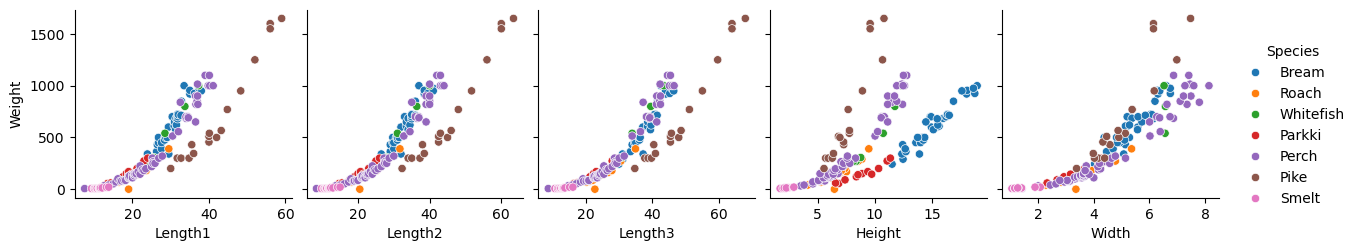

In [5]:
sns.pairplot(data=df, x_vars=df.columns[2:], y_vars='Weight', hue='Species')

## Simple polynomial regression
---
- As an example, we will apply simple polynomial regression between `Width` and `Weight`.
- Based on the charts above, we can observe a clear relationship between these two features.

### Preprocessing

In [6]:
X, y = df[['Width']], df[['Weight']]

X_poly = PolynomialFeatures(degree=2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2)

### Training our model

In [7]:
model = LinearRegression().fit(X_train, y_train)

print('Coefficient : ', model.coef_)
print('Intercept : ', model.intercept_)

Coefficient :  [[ 0.         -4.50290248 22.13022805]]
Intercept :  [-74.52740771]


### Plotting and evaluating our model

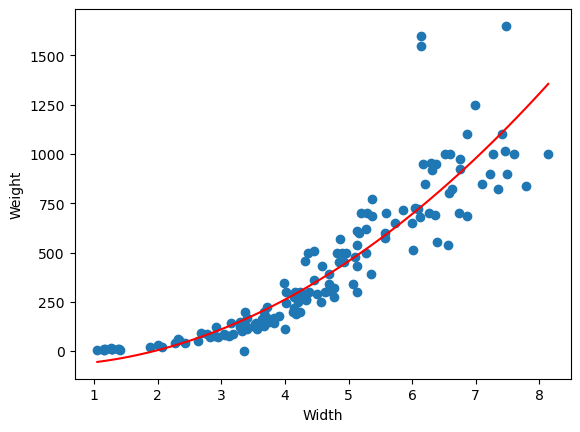

In [8]:
plt.scatter(X, y)

plt.xlabel('Width')
plt.ylabel('Weight')

X_dummy = np.linspace(X.min(), X.max(), 100)

plt.plot(
    X_dummy,
    (X_dummy ** 2) * model.coef_[0][2] + X_dummy * model.coef_[0][1] + model.intercept_,
    'r'
)

In [9]:
y_hat = model.predict(X_test)

model_evaluation(y_test, y_hat)

R2 score            =  0.9142500771775218
Mean absolute error =  71.3875477798396
Mean squared error  =  8812.54071704324


## Multiple polynomial regression
---
- Because we have different species, we should turn this categorical feature into binary fields (known as one-hot encoding).
- Also, we have multiple features, it is better to normalize our data too before proceeding.

### Preprocessing

In [10]:
X, y = df.drop('Weight', axis=1), df[['Weight']]

X = pd.get_dummies(X, columns=['Species'], dtype=int)
X

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [11]:
scaler = StandardScaler()
X, y = scaler.fit_transform(X), scaler.fit_transform(y)

X_poly = PolynomialFeatures(degree=2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2)

### Training our model

In [12]:
model = LinearRegression().fit(X_train, y_train)

print('Coefficient : ', model.coef_)
print('Intercept : ', model.intercept_)

Coefficient :  [[-5.51297576e+10 -6.30703248e-01  9.44178654e-01  1.20486901e-01
   4.81979434e-01  1.59112334e-01 -6.27555694e+08 -6.62741653e+09
   4.31933030e+10 -8.01616303e+08  7.59651656e+10 -9.73144770e+10
   4.53484955e+10  9.04425144e+00 -1.75369692e+01 -4.50379086e+00
  -8.92092896e+00  8.41084886e+00 -1.25101288e+09 -7.66203480e+08
  -1.44221347e+09 -9.33008396e+08 -1.00124260e+09 -8.55588501e+08
  -5.75358141e+08 -6.21943760e+00  4.34707842e+01  4.54008389e+00
  -1.28293481e+01 -2.01647571e+09 -1.23502380e+09 -2.32466701e+09
  -1.50389239e+09 -1.61387735e+09 -1.37910123e+09 -9.27405074e+08
  -2.37784939e+01  5.51243758e+00  3.28903913e+00  8.10638470e+08
   4.96488900e+08  9.34533706e+08  6.04576107e+08  6.48790890e+08
   5.54409118e+08  3.72823850e+08 -9.09348488e-01  6.11333847e-01
  -4.21266497e+09 -2.58011615e+09 -4.85651442e+09 -3.14181559e+09
  -3.37158766e+09 -2.88111157e+09 -1.93746291e+09  2.11600184e-01
  -2.83363574e+09 -1.73550695e+09 -3.26671903e+09 -2.11333229

### Evaluating our model

In [13]:
y_hat = model.predict(X_test)

model_evaluation(y_test, y_hat)

R2 score            =  0.9837339644936193
Mean absolute error =  0.08798502680184045
Mean squared error  =  0.014989961866414582


---
<center>
    <h3>
        <i>
            This concludes the notebook. Feel free to reach out with any questions or suggestions!
        </i>
    </h3>
</center>